- [x] Independently implement one of the classification methods, with the ability to adjust hyperparameters.

In [103]:
import numpy as np

class LogRegression:
    
    def __init__(self, learn_rate=0.001, num_iters=1000):
        self.learn_rate = learn_rate
        self.num_iters = num_iters
        self.w = None
        self.b = None
    
    def sigmoid(self, x):
        return(1 / (1 + np.exp(-x)))
    
    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0
        
        for i in range(self.num_iters):
            f = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(f)
            d_w = (1 / n) * np.dot(X.T, (y_pred - y))
            d_b = (1 / n) * np.sum(y_pred - y)
            self.w = self.w - self.learn_rate * d_w
            self.b = self.b - self.learn_rate * d_b
            
    def predict(self, X):
        f = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(f)
        y_pred_class = [1 if j > 0.5 else 0 for j in y_pred]
        return y_pred_class        

- [x] Take data to predict heart disease [here](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (target feature for prediction --- **target** ). A demo notebook with the analysis of this data can be found [here](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb)

In [42]:
import pandas as pd

df = pd.read_csv('data/heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


- [x] Read data, perform initial data analysis, if necessary, clean the data (**Data Cleaning**).

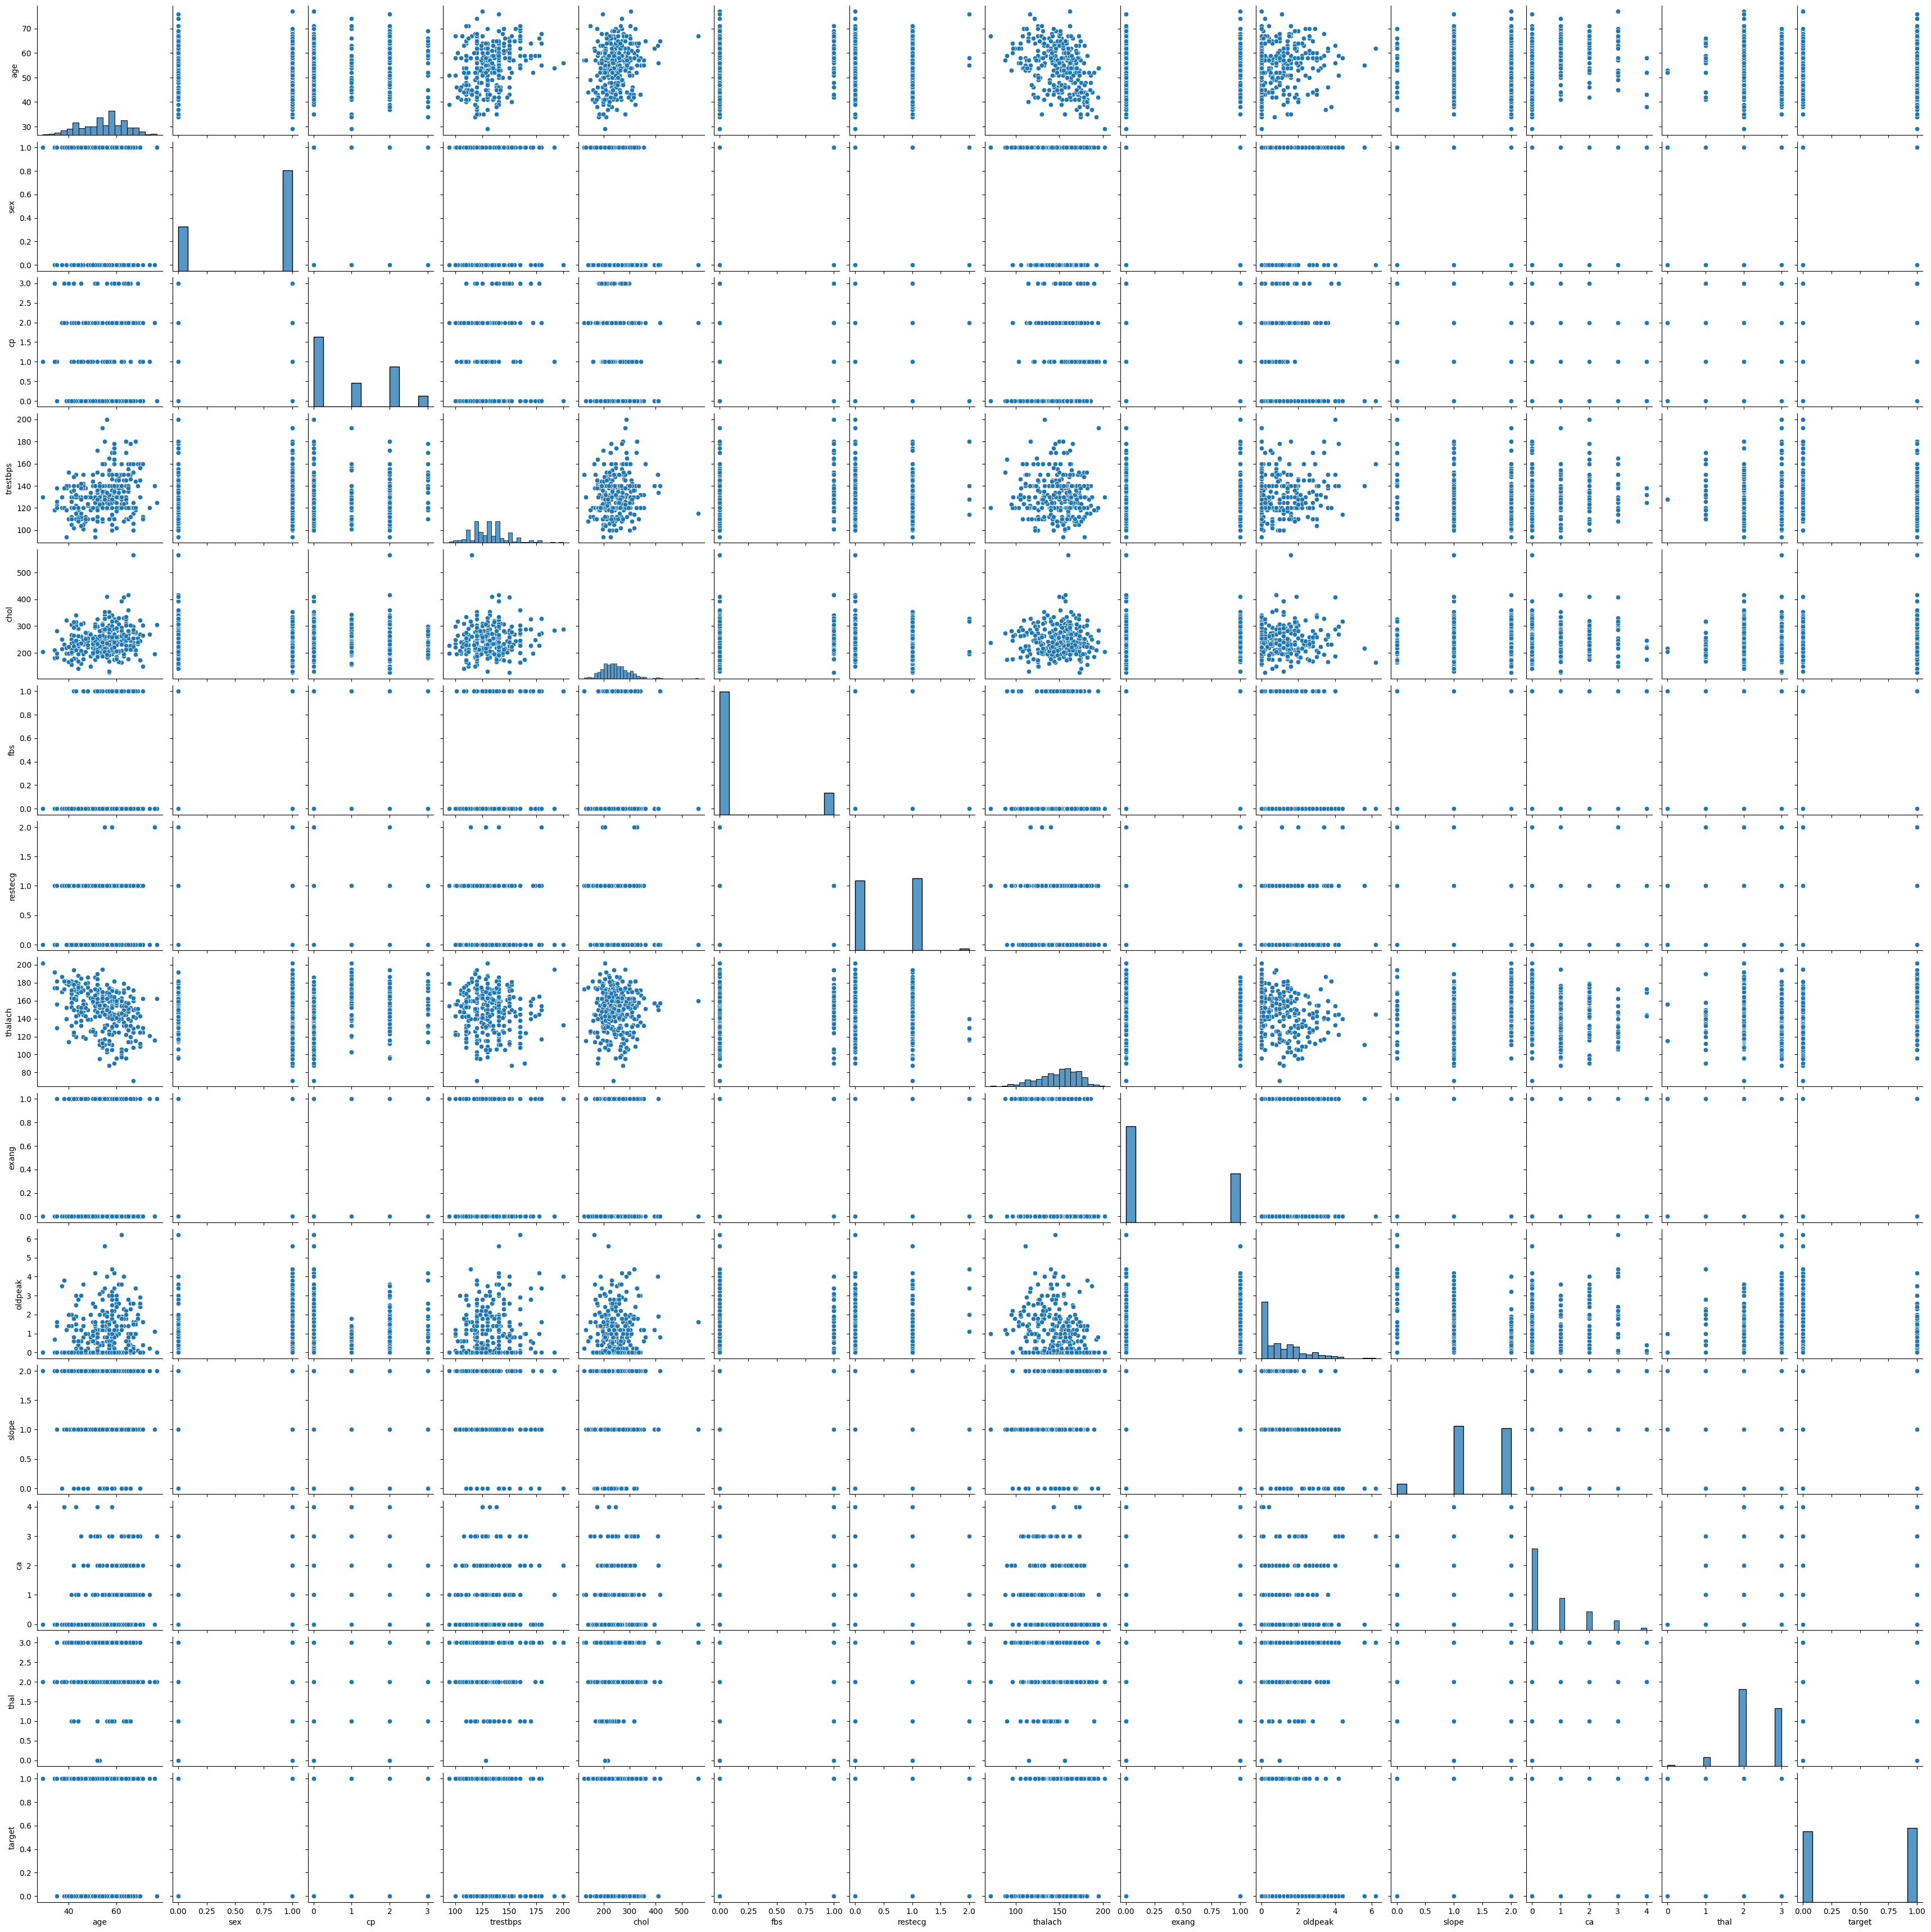

In [43]:
import seaborn as sns

sns.pairplot(df)

### Data explanation

Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

<AxesSubplot: >

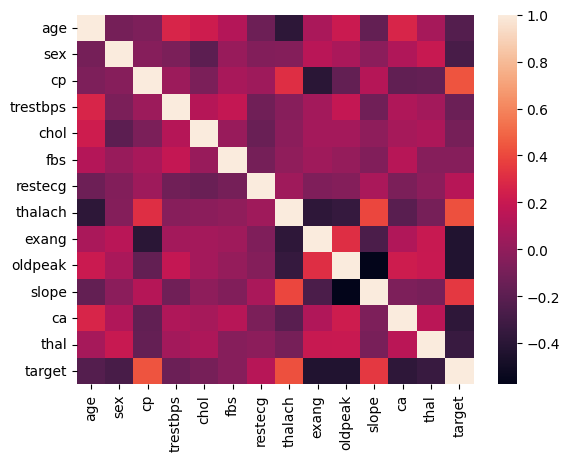

In [44]:
sns.heatmap(df.corr())

In [45]:
df = df.dropna()

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [46]:
df.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [47]:
df.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [48]:
df.min()

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

- [x] Perform exploratory analysis (**EDA**), use visualization, draw conclusions that may be useful in further solving the classification problem.

In [49]:
df["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

<AxesSubplot: ylabel='Frequency'>

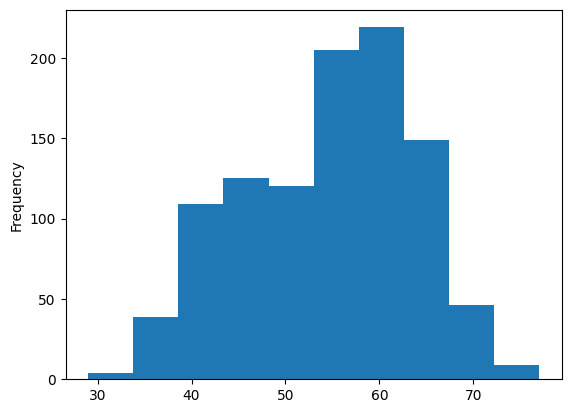

In [50]:
df["age"].plot.hist()

In [51]:
df["sex"].unique()

array([1, 0])

<AxesSubplot: ylabel='Frequency'>

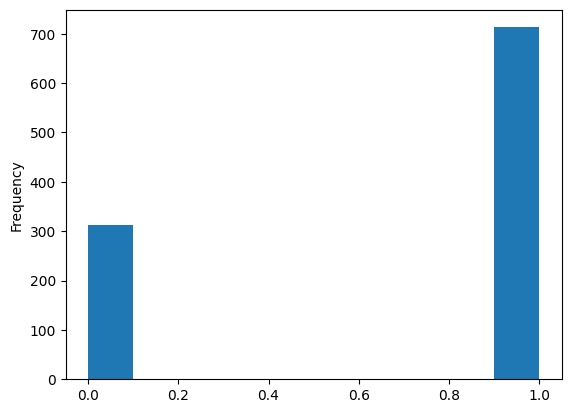

In [52]:
df["sex"].plot.hist()

In [53]:
df["cp"].unique()

array([0, 1, 2, 3])

<AxesSubplot: ylabel='Frequency'>

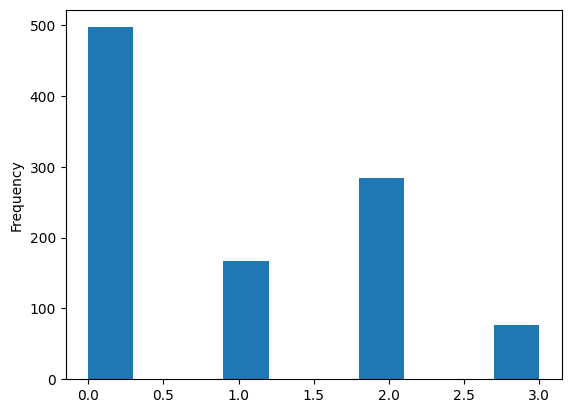

In [54]:
df["cp"].plot.hist() # This feature had higher positive correlation with the target

In [55]:
df["trestbps"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

<AxesSubplot: ylabel='Frequency'>

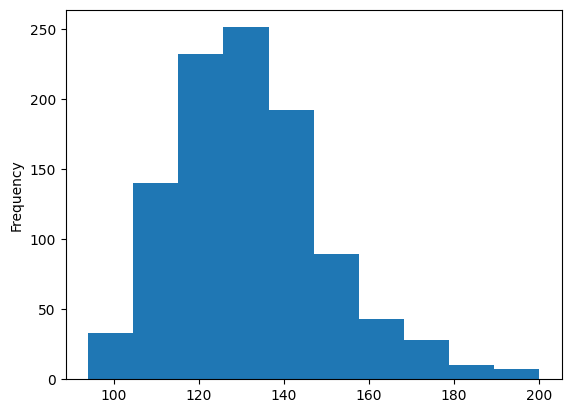

In [56]:
df["trestbps"].plot.hist()

In [57]:
df["chol"].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

<AxesSubplot: ylabel='Frequency'>

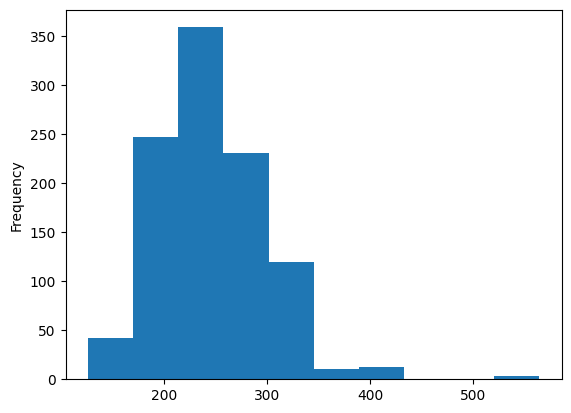

In [58]:
df["chol"].plot.hist()

In [59]:
df["fbs"].unique()

array([0, 1])

<AxesSubplot: ylabel='Frequency'>

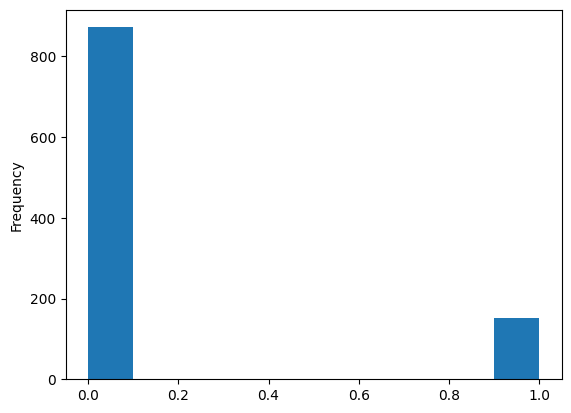

In [60]:
df["fbs"].plot.hist()

In [61]:
df["restecg"].unique()

array([1, 0, 2])

<AxesSubplot: ylabel='Frequency'>

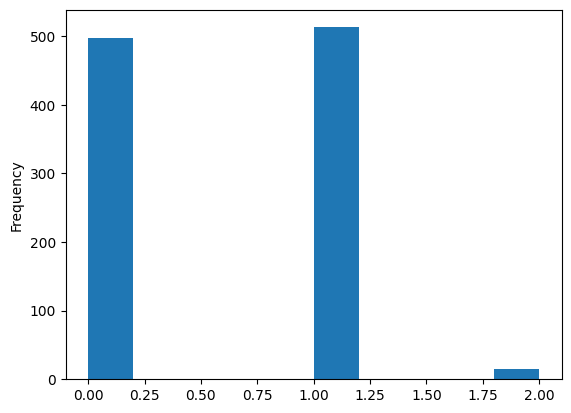

In [62]:
df["restecg"].plot.hist()

In [63]:
df["thalach"].unique() # This feature had higher positive correlation with the target

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

<AxesSubplot: ylabel='Frequency'>

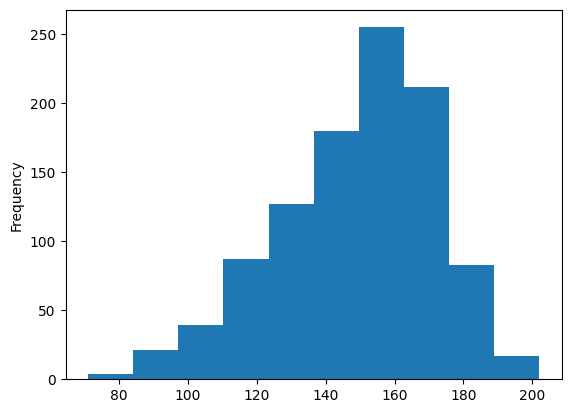

In [64]:
df["thalach"].plot.hist()

In [65]:
df["exang"].unique()

array([0, 1])

<AxesSubplot: ylabel='Frequency'>

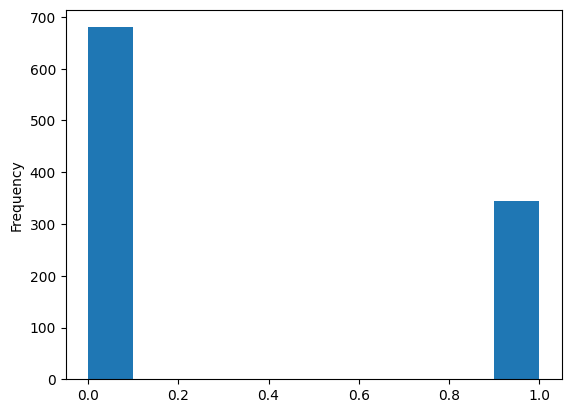

In [66]:
df["exang"].plot.hist() # This feature had higher negative correlation with the target

In [67]:
df["oldpeak"].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

<AxesSubplot: ylabel='Frequency'>

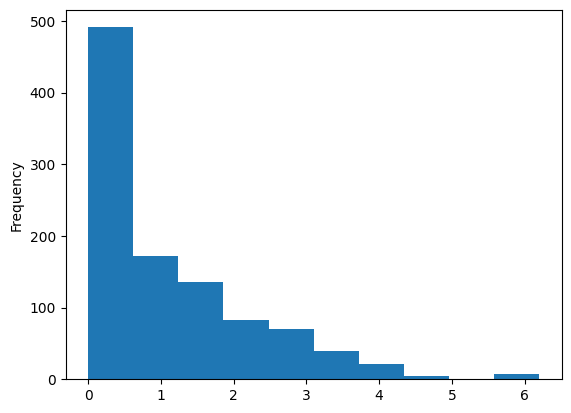

In [68]:
df["oldpeak"].plot.hist() # This feature had higher negative correlation with the target

In [69]:
df["slope"].unique()

array([2, 0, 1])

<AxesSubplot: ylabel='Frequency'>

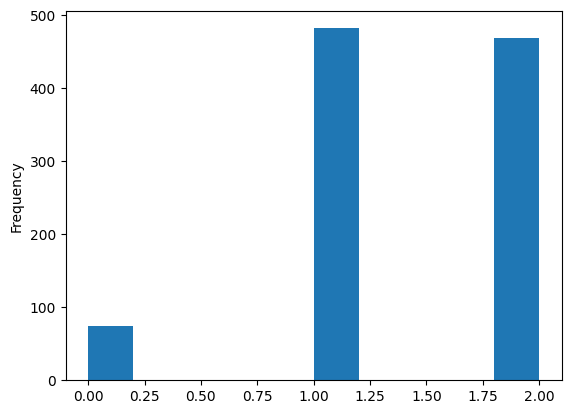

In [70]:
df["slope"].plot.hist() # This feature had higher positive correlation with the target

In [71]:
df["ca"].unique()

array([2, 0, 1, 3, 4])

<AxesSubplot: ylabel='Frequency'>

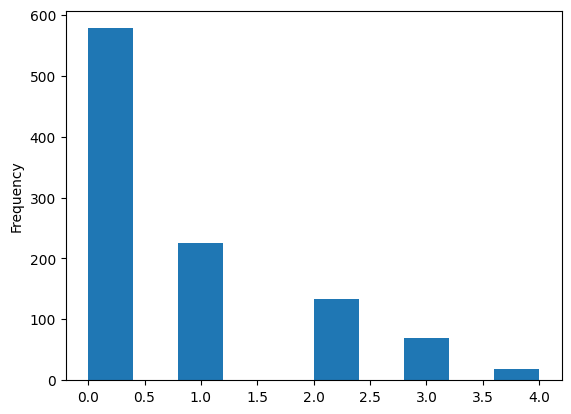

In [72]:
df["ca"].plot.hist() # This feature had higher negative correlation with the target

In [73]:
df["thal"].unique()

array([3, 2, 1, 0])

<AxesSubplot: ylabel='Frequency'>

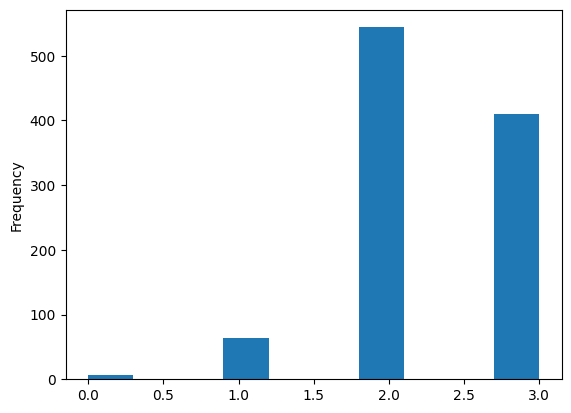

In [74]:
df["thal"].plot.hist()

In [75]:
df["target"].unique()

array([0, 1])

<AxesSubplot: ylabel='Frequency'>

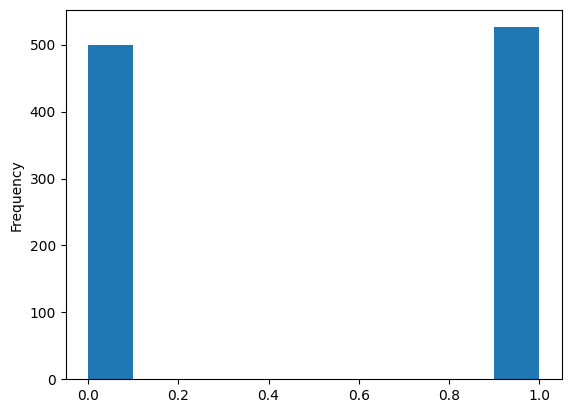

In [76]:
df["target"].plot.hist()

In [77]:
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


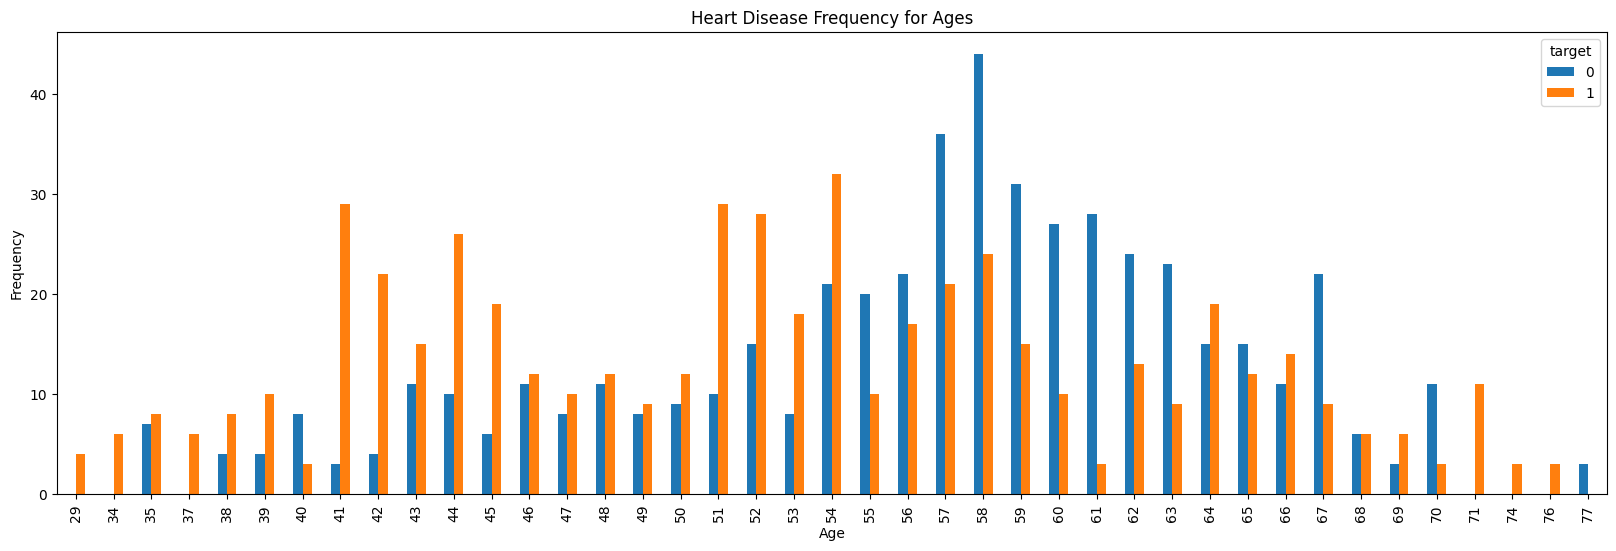

In [88]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

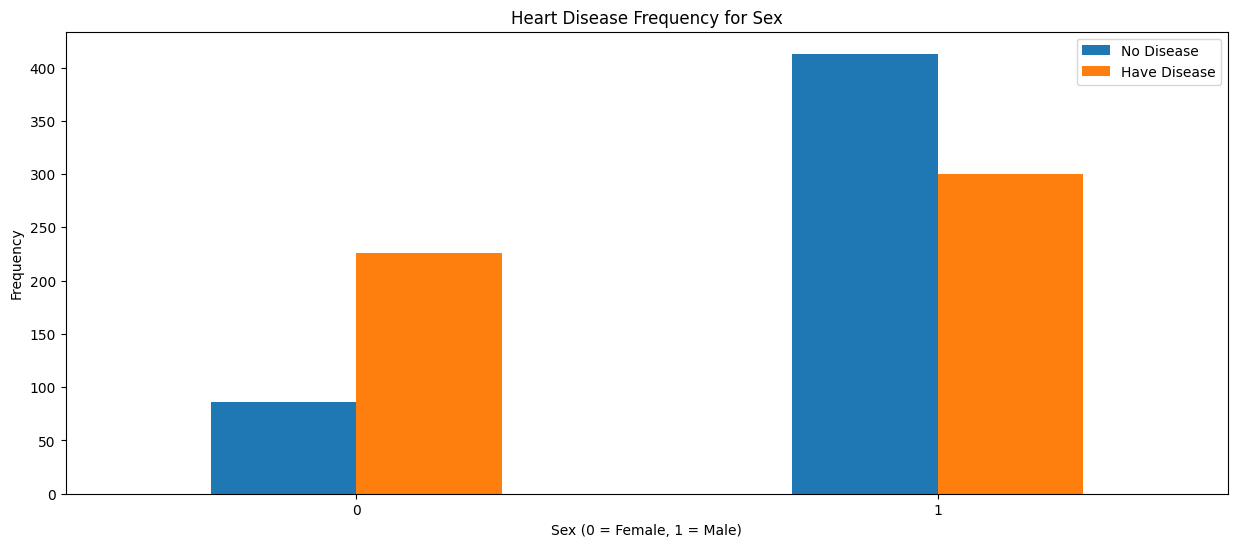

In [89]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

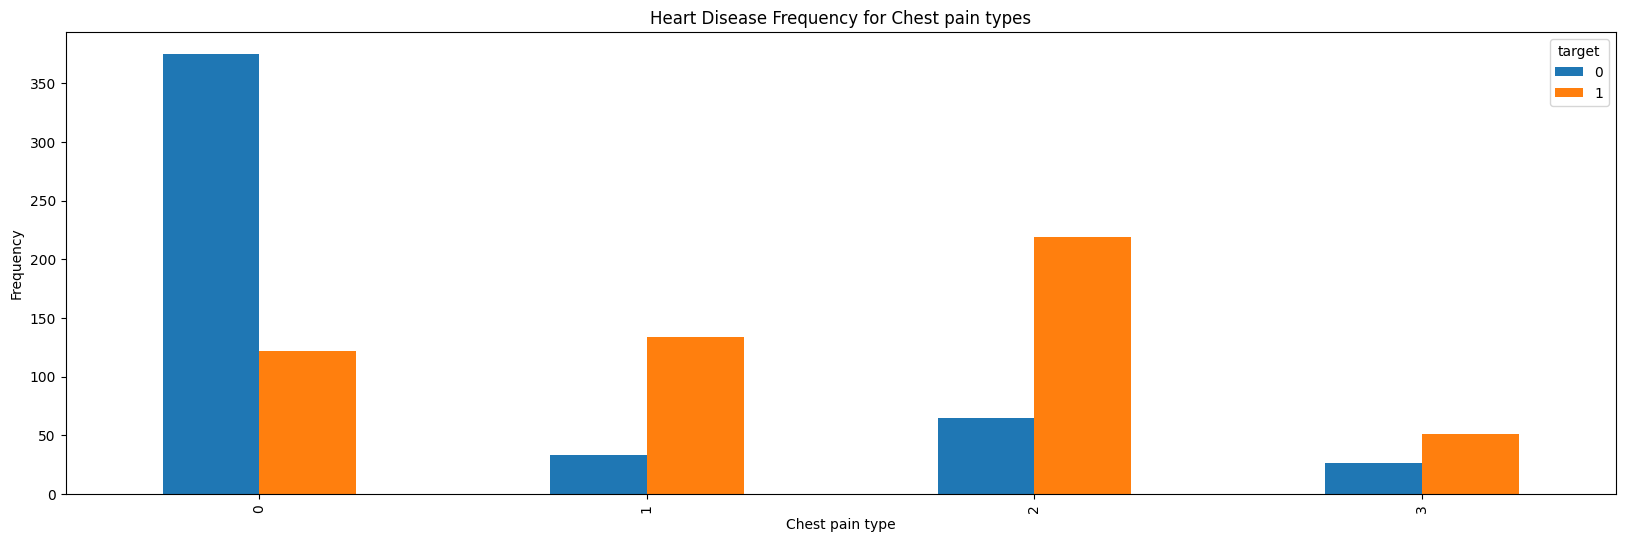

In [84]:
import matplotlib.pyplot as plt

pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Chest pain types')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.show()

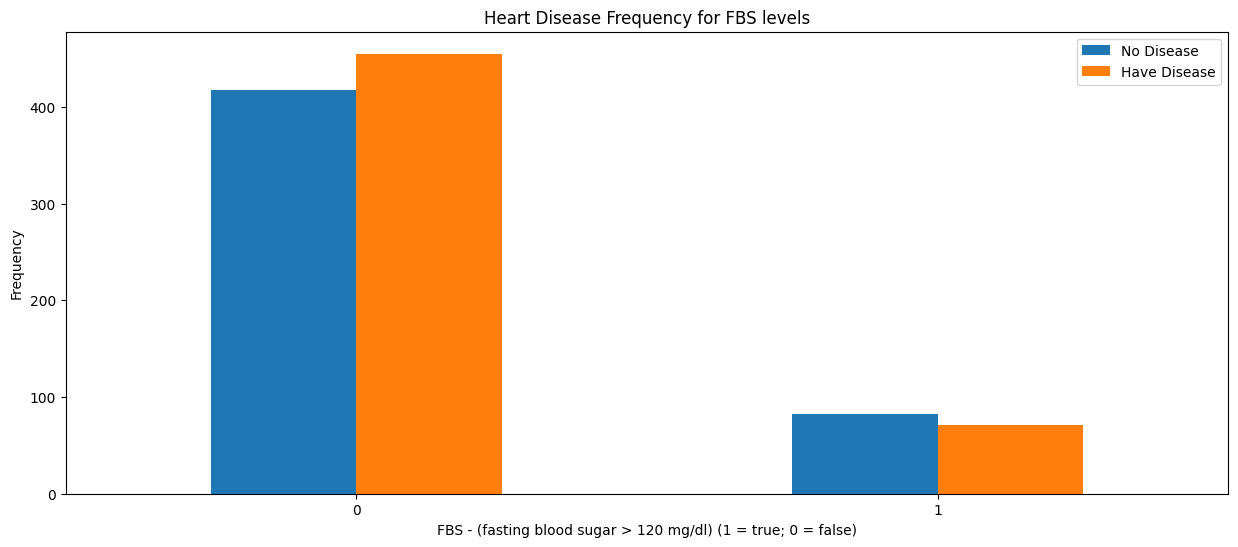

In [90]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for FBS levels')
plt.xlabel('FBS - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

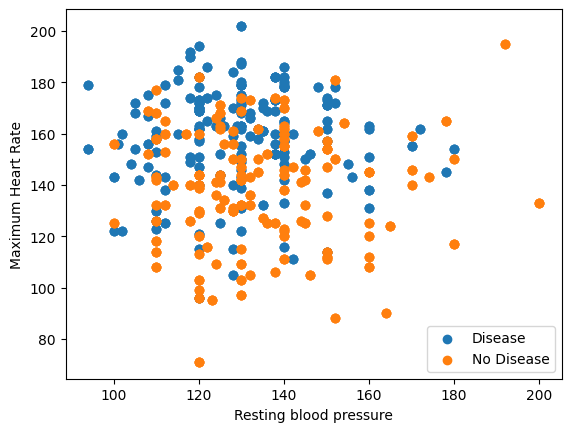

In [94]:
plt.scatter(x=df.trestbps[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.trestbps[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Resting blood pressure")
plt.ylabel("Maximum Heart Rate")
plt.show()

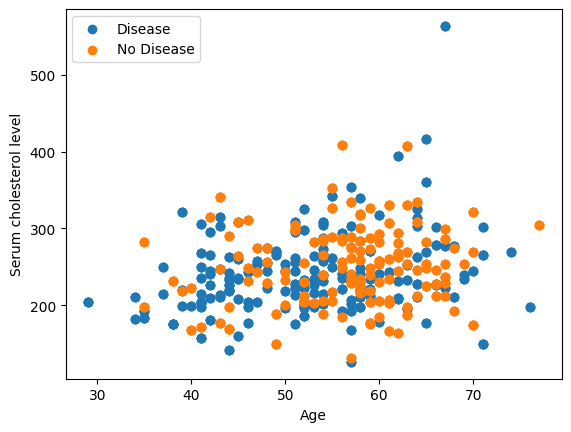

In [92]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Serum cholesterol level")
plt.show()

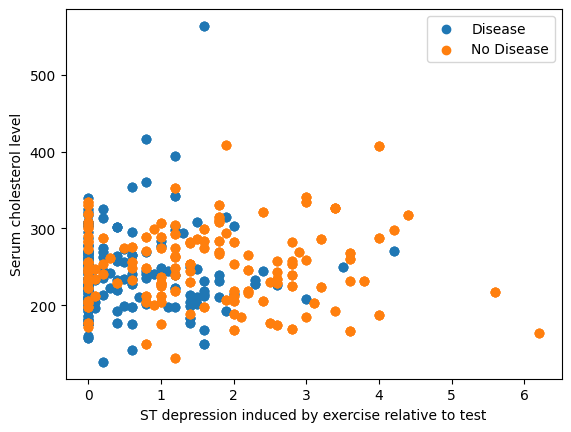

In [96]:
plt.scatter(x=df.oldpeak[df.target==1], y=df.chol[(df.target==1)])
plt.scatter(x=df.oldpeak[df.target==0], y=df.chol[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("ST depression induced by exercise relative to test")
plt.ylabel("Serum cholesterol level")
plt.show()

- [x] If necessary, perform useful data transformations (for example, transform categorical features into quantitative ones), remove unnecessary features, create new ones (**Feature Engineering**).


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = df.drop(columns=["target"]), df_1["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [119]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    return accuracy

In [120]:
log_reg = LogRegression(learn_rate=0.0001, num_iters=1000)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)

print("Accuracy: ", accuracy(y_test, pred))

Accuracy:  0.6585365853658537


- [x] Using **hyperparameter matching**, **cross-validation** and, if necessary, **data scaling**, achieve the best prediction quality from your implementation on a preselected test set.


In [121]:
log_reg = LogRegression(learn_rate=0.00005, num_iters=1000)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)

print("Accuracy: ", accuracy(y_test, pred))

Accuracy:  0.7463414634146341


In [122]:
log_reg = LogRegression(learn_rate=0.00005, num_iters=1500)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)

print("Accuracy: ", accuracy(y_test, pred))

Accuracy:  0.7463414634146341


In [123]:
log_reg = LogRegression(learn_rate=0.00005, num_iters=1500)
log_reg.fit(X_train_scaled, y_train)

pred = log_reg.predict(X_test_scaled)

print("Accuracy: ", accuracy(y_test, pred))

Accuracy:  0.824390243902439


- [x] Repeat the previous point for library implementations (e.g. from **sklearn**) of all passed classification methods (**logistic regression, svm, knn, naive bayes, decision tree**).


In [108]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
acc = lr.score(X_test_scaled, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8585


In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

3 NN Score: 0.9805


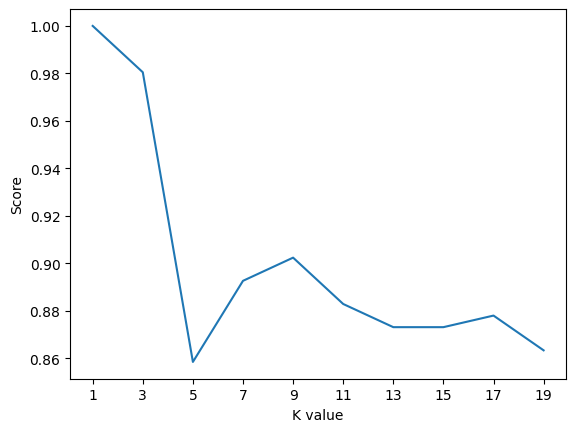

Maximum KNN Score is 1.0000


In [110]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))
    
plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

In [111]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.9024


In [112]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.8537


In [124]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 1.0000


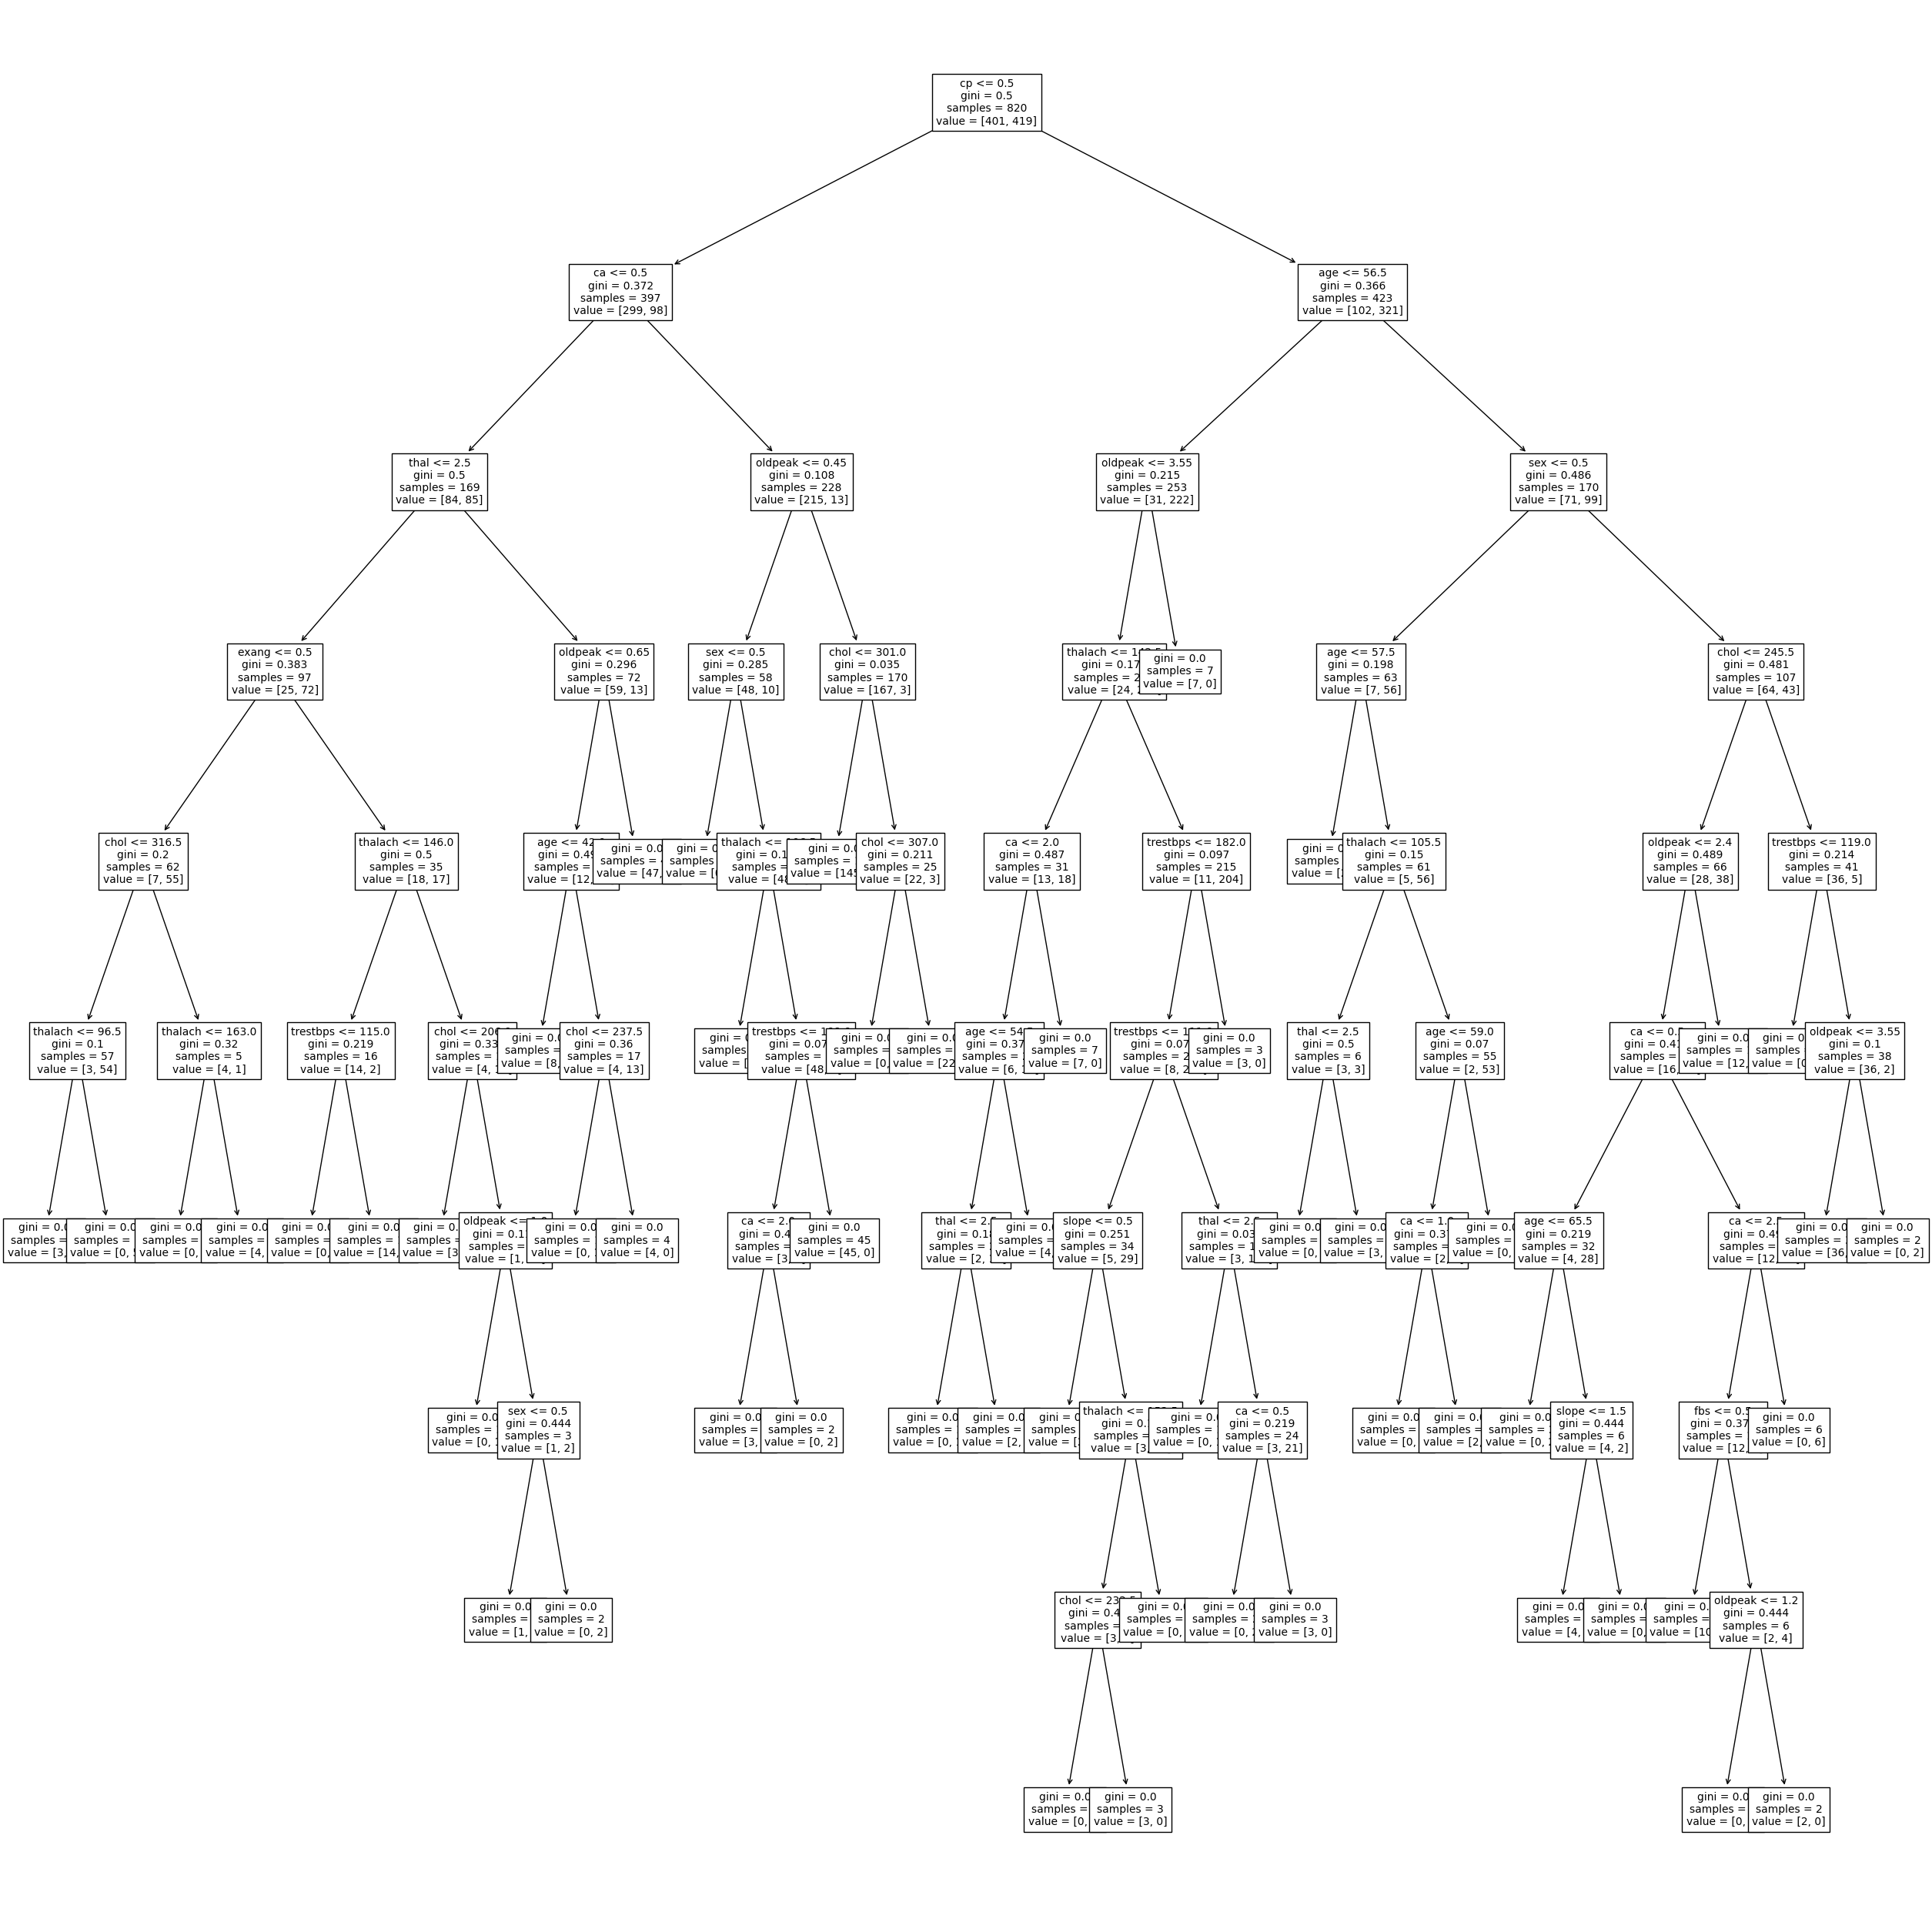

In [125]:
from sklearn import tree

plt.figure(figsize=(32, 32))
tree.plot_tree(dtc, feature_names=df.columns,fontsize=10);

- [x] Compare all trained models, build their **confusion matrices**. Draw conclusions about the models obtained in the framework of solving the classification problem on the selected data.


In [127]:
accuracies["Logistic Regression from scratch"] = accuracy(y_test, pred)

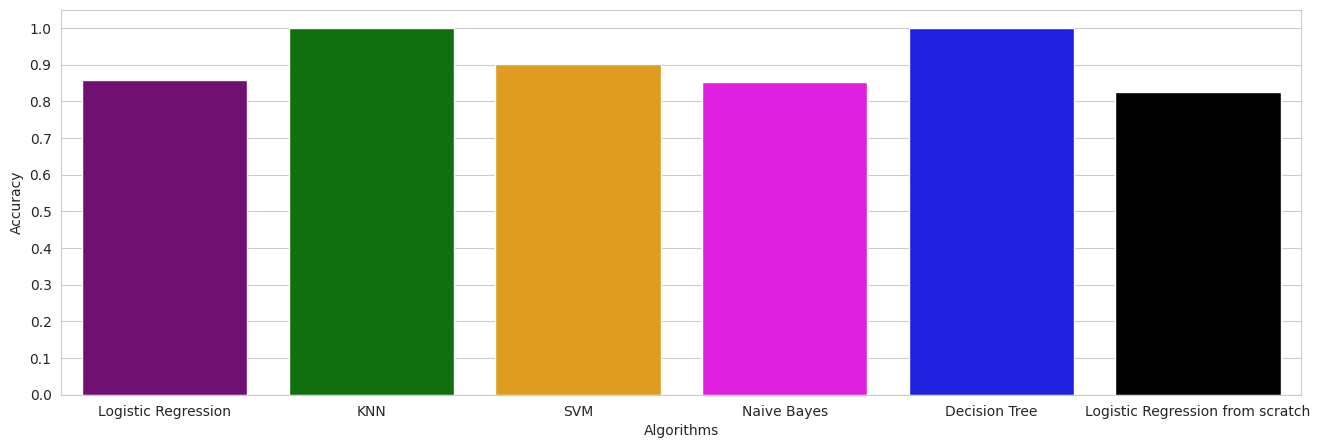

In [128]:
colors = ["purple", "green", "orange", "magenta", "blue", "black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [130]:
# Predicted values
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)
y_head_lrs = log_reg.predict(X_test_scaled)

In [131]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_lrs = confusion_matrix(y_test, y_head_lrs)

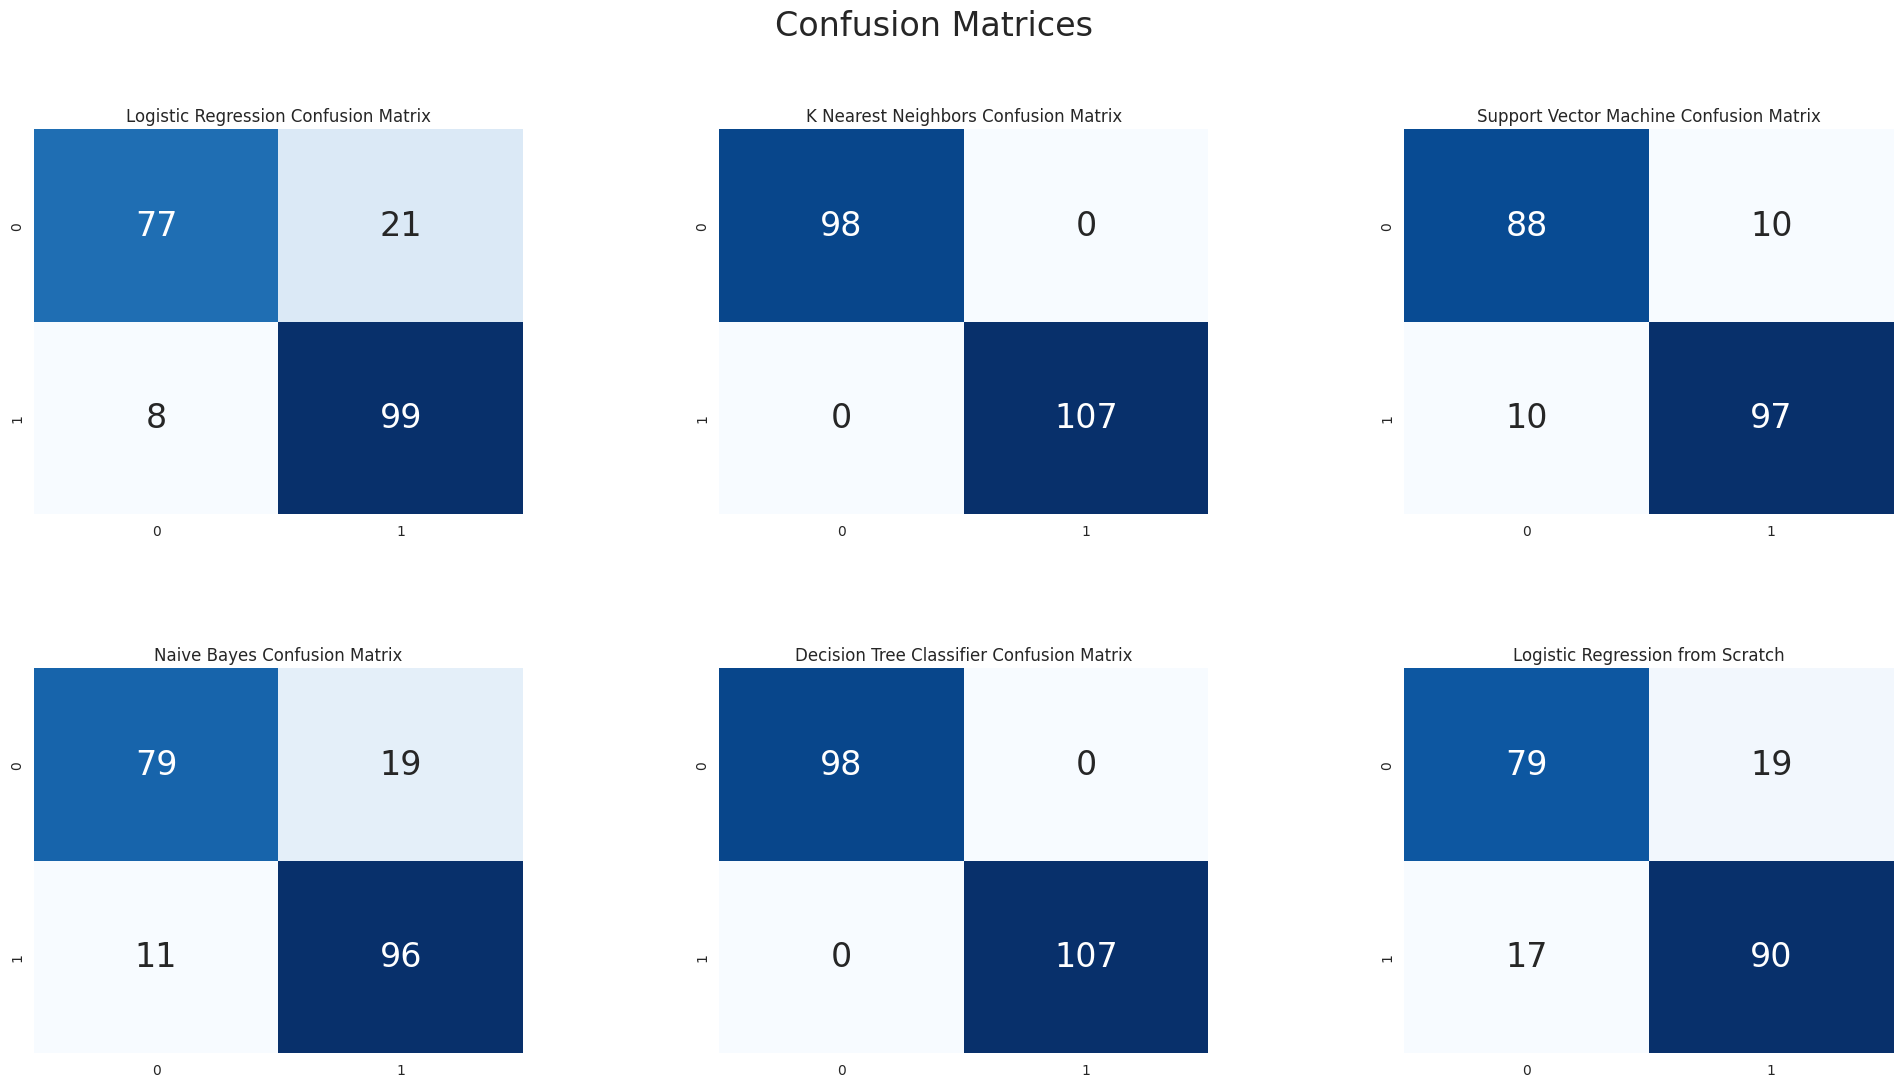

In [133]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Logistic Regression from Scratch")
sns.heatmap(cm_lrs,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()